# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/content/Mouse_metadata.csv"
study_results_path = "/content/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_file_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
data_file_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.

number_of_mice = data_file_complete['Mouse ID'].nunique()
print(f'Number of mice IDs: {number_of_mice}')

Number of mice IDs: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_timepoints = data_file_complete[data_file_complete.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse = duplicate_timepoints['Mouse ID'].unique()
print(f"array{duplicate_mouse}, dtype={duplicate_mouse.dtype}")

array['g989'], dtype=object


In [5]:
# Optional: Get all the data for the duplicate mouse ID.

duplicate_mouse_data = data_file_complete.loc[data_file_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_data = data_file_complete[~data_file_complete['Mouse ID'].isin(duplicate_mouse)]
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.

updated_unique_mice = cleaned_data['Mouse ID'].nunique()
print(f'Updated number of unique mice IDs: {updated_unique_mice}')

Updated number of unique mice IDs: 248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

In [9]:
#to find the information about data
info = cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [10]:
describe = cleaned_data.describe()
describe

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [11]:
#to get the count of each regimen
drug_regimen = cleaned_data['Drug Regimen'].value_counts()
drug_regimen

,count
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Infubinol,178
Ceftamin,178


In [12]:
#to find the mean of tumor volume
tumor_volume_mean = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_volume_mean

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [13]:
#to find the median of tumor volume
tumor_volume_median = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_volume_median


,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [14]:
#to find the variance of tumor volume
tumor_volume_var = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_volume_var

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [15]:
#to find the standard of deviation of tumor volume
tumor_volume_std = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_volume_std

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [16]:
#to find the Standard Error of the Mean of tumor volume
tumor_volume_sem = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
tumor_volume_sem

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [17]:
#to create a data frame for the summary statistic
summary_statistic = pd.DataFrame({"Mean Tumor Volume": tumor_volume_mean,
                                  "Median Tumor Volume": tumor_volume_median,
                                  "Tumor Volume Variance": tumor_volume_var,
                                  "Tumor Volume Std. Dev.": tumor_volume_std,
                                  "Tumor Volume Std. Err.": tumor_volume_sem
                                 })

summary_statistic

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
#to create an aggregation advanced data frame
advanced_summary_statistic = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)

advanced_summary_statistic

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
#to create a sum single summary line of the data
single_line_summary = (cleaned_data[['Drug Regimen', 'Tumor Volume (mm3)']].agg(
        Total=('Tumor Volume (mm3)', 'sum'),
        Mean=('Tumor Volume (mm3)', 'mean'),
        Median=('Tumor Volume (mm3)', 'median'),
        Variance=('Tumor Volume (mm3)', 'var'),
        Std=('Tumor Volume (mm3)', 'std'),
        SEM=('Tumor Volume (mm3)', 'sem')
))

single_line_summary


,Tumor Volume (mm3)
Total,94818.351277
Mean,50.435293
Median,48.933454
Variance,79.462907
Std,8.914197
SEM,0.205591


## Bar and Pie Charts

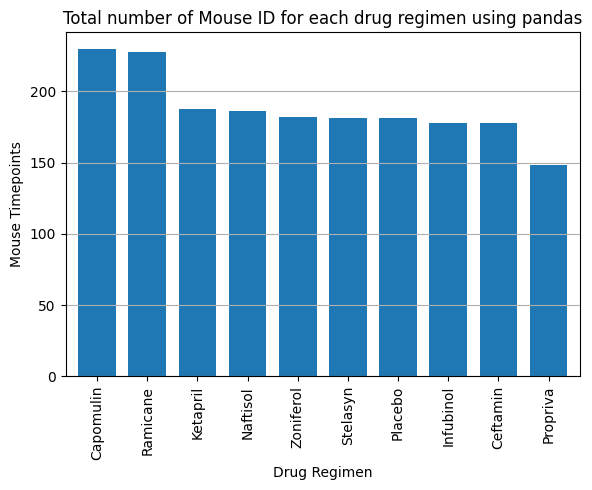

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_regimen = cleaned_data['Drug Regimen'].value_counts()

plt.figure(figsize=(6, 5))
count_regimen.plot(kind='bar', color='#1f77b4', width=0.75)

plt.title('Total number of Mouse ID for each drug regimen using pandas')
plt.xlabel('Drug Regimen')
plt.ylabel('Mouse Timepoints')

plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

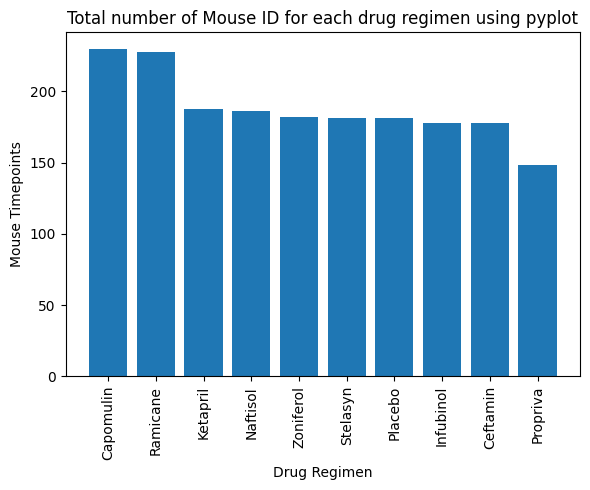

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(6,5))
plt.bar(count_regimen.index, count_regimen.values, alpha=1.0, facecolor='#1f77b4', align="center")
#plt.bar(count_regimen.index, count_regimen.values) #to write what structure / x-axis / y-axis (x axis always come first before y axis)

plt.xlabel('Drug Regimen')
plt.ylabel('Mouse Timepoints')
plt.title('Total number of Mouse ID for each drug regimen using pyplot')

plt.xticks(rotation=90)
#plt.grid(axis='y')
plt.tight_layout()

plt.show()

In [22]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()
unique_gender_counts = pd.DataFrame(unique_mice)['Sex'].value_counts()
unique_gender_counts

,count
Sex,
Male,125
Female,123


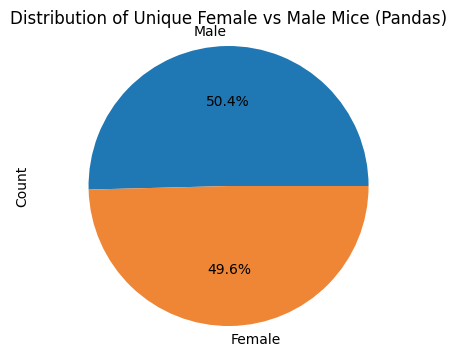

In [23]:
# Make the pie chart with pandas
plt.figure(figsize=(5,4))
unique_gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=['#1f77b4', '#EF8636'])

# Make the pie chart
plt.title('Distribution of Unique Female vs Male Mice (Pandas)')
plt.ylabel('Count')
plt.axis('equal')
plt.show()

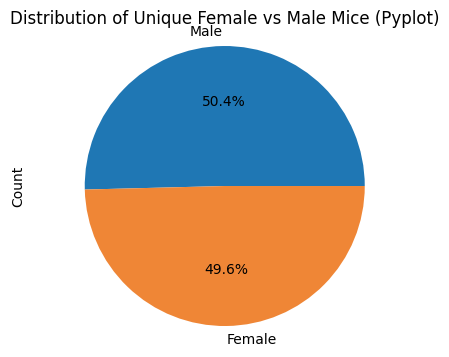

In [24]:
#make the pie charts with pyplot
plt.figure(figsize=(5,4))
plt.pie(unique_gender_counts,
        labels=unique_gender_counts.index,
        autopct='%1.1f%%',
        startangle=0,
        colors=['#1f77b4', '#EF8636'])


plt.title('Distribution of Unique Female vs Male Mice (Pyplot)')
plt.ylabel('Count')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_groups

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [27]:
last_timepoint = cleaned_data[cleaned_data['Drug Regimen'].isin(treatment_groups)]
last_timepoint.reset_index(drop=True, inplace=True)
last_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
809,z581,25,54.316407,2,Infubinol,Female,24,25
810,z581,30,56.286750,2,Infubinol,Female,24,25
811,z581,35,58.628399,3,Infubinol,Female,24,25
812,z581,40,60.053740,3,Infubinol,Female,24,25


In [28]:
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = last_timepoint.groupby('Mouse ID').max()['Timepoint'].reset_index()
greatest_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [29]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoint = pd.merge(greatest_timepoint, last_timepoint, on=['Mouse ID', 'Timepoint'])
merged_last_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [30]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds

In [31]:
treatment_group = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
mm3_volumes_data = []

for treatment in treatment_group:
    treatment_data = merged_last_timepoint[merged_last_timepoint['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    mm3_volumes_data.append(treatment_data)

    Q1 = treatment_data.quantile(0.25)
    Q3 = treatment_data.quantile(0.75)
    IQR = Q3 - Q1  # Rentang interkuartil (IQR)

    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

     # add subset
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    print(f"{treatment} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

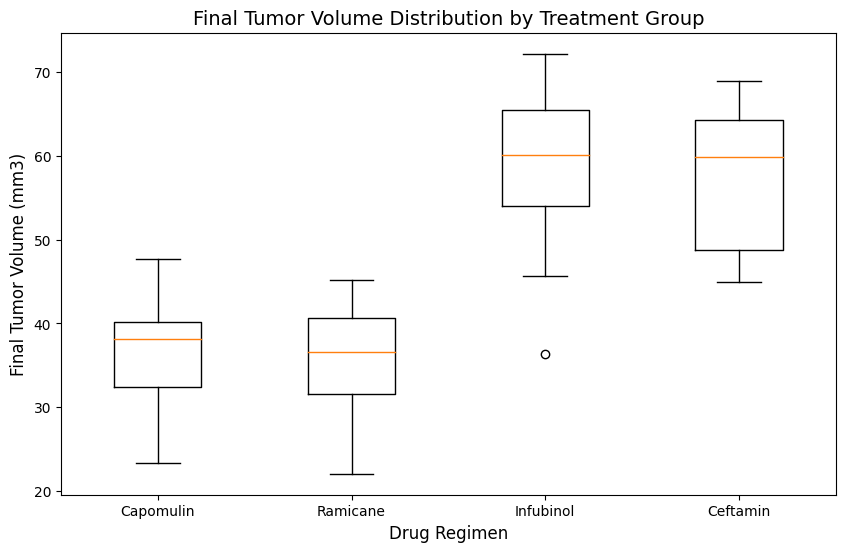

In [32]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot([merged_last_timepoint[merged_last_timepoint['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatment_groups],
            labels=treatment_groups)
plt.title('Final Tumor Volume Distribution by Treatment Group', fontsize=14)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Final Tumor Volume (mm3)', fontsize=12)
plt.show

In [33]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


In [34]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [36]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [37]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
